<h1 align="center">Statistical Inference 2, Demo 2</h1>

<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
from scipy.stats import poisson
from scipy.optimize import minimize

<h3 align="left">Task 2</h3>

Simulate data in the following way:


$\quad$ set.seed(20190125)\
$\quad$ x <- c(rnorm(500,179,8), rnorm(1000,172,6))


a) Fit a normal distribution to the data.\
b) Use the R package 'mclust' and fit a mixture of two normal distributions to the data.\
c) Draw a diagram where the density functions of the fitted models are presented.

In [131]:
np.random.seed(20190125)
x1 = np.random.normal(179, 8, 500)
x2 = np.random.normal(172, 6, 1000)
x = np.concatenate([x1, x2], axis=0)
x_mean = np.mean(x)
x_std = np.std(x)

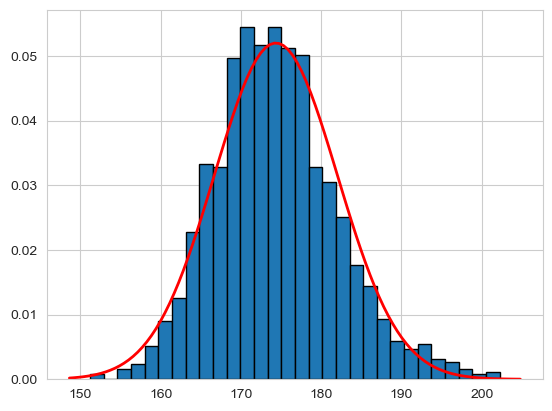

In [107]:
sns.set_style("whitegrid")

# Histogram
plt.hist(x, bins=30, density=True, edgecolor='black')

# Normal distribution curve
x_min, x_max = plt.xlim()
x_vals = np.linspace(x_min, x_max, 100)
normal_pdf = norm.pdf(x_vals, x_mean, x_std)
plt.plot(x_vals, normal_pdf, linewidth=2, color='red');

- **density=True:** Normalizes the histogram, meaning the area under the histogram sums to 1.
- **xmin, xmax = plt.xlim():** Retrieves the current x-axis limits of the plot. plt.xlim() without any arguments returns a tuple containing the minimum and maximum limits of the x-axis of the current plot (i.e., it captures the x-axis limits of the histogram). 

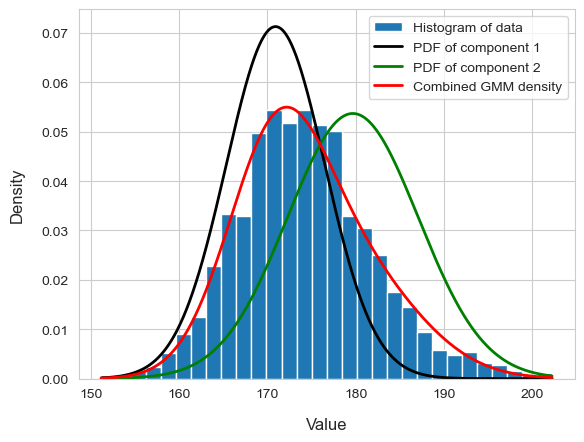

In [147]:
def calculate_pdf(x, mean, std):
    return norm.pdf(x, mean, std)

# Fit the model with two components
model = GaussianMixture(n_components=2)
gm = model.fit(x.reshape(-1, 1))

means = gm.means_.flatten()
covs = gm.covariances_.flatten()

x_min, x_max = np.min(x), np.max(x)
x_vals = np.linspace(x_min, x_max, 1500)

# Calculate PDFs for each component
pdf1 = calculate_pdf(x_vals, means[0], np.sqrt(covs[0]))
pdf2 = calculate_pdf(x_vals, means[1], np.sqrt(covs[1]))

# Combined GMM PDF
logprob = model.score_samples(x_vals.reshape(-1, 1))
combined_pdf = np.exp(logprob)

# Plotting
fig, ax = plt.subplots()
ax.hist(x, bins=30, density=True, label='Histogram of data')
ax.plot(x_vals, pdf1, color='black', linewidth=2, label='PDF of component 1')
ax.plot(x_vals, pdf2, color='green', linewidth=2, label='PDF of component 2')
ax.plot(x_vals, combined_pdf, color='red', linewidth=2, label='Combined GMM density')
ax.set_xlabel('Value', size=12, labelpad=12)
ax.set_ylabel('Density', size=12, labelpad=12)
plt.legend();

*Note to self*. Combined GMM PDF can also be calculated by using the weights_ attribute of a fitted GMM model:

Let **gm** be a fitted GMM model with two components, and let **pdf1** and **pdf2** be the PDF's for components 1 and 2, respectively. Now:

$$ combined\_pdf = gm.weights\_[0]*pdf1 + gm.weights\_[1]*pdf2$$

Note that gm.weights_[0] is associated with the first component and
gm.weights_[1] is associated with the second component.

<br>

<h3 align="left">Task 6</h3>

The distribution of a random variable X depends on another random variable Z in the following way:

in group Z = 1: $\, X \sim Poisson(1)$
in group Z = 2: $\, X \sim Poisson(\theta),$

where $\, \theta \,$ is an unknown parameter. Therefore, the distribution is a mixture of two Poisson distributions. The dataset contains only the variable X. The variable Z is unobserved, but it is known that P(Z = 1) = 0.3 and P(Z = 2) = 0.7.

Simulate the dataset as follows:


$\quad$ set.seed(20190204)\
$\quad$ theta <- 3\
$\quad$ n <- 200\
$\quad$ Z <- 1 + rbinom(n,1,0.7)\
$\quad$ x <- (Z==1) * rpois(n,1) + (Z==2) * rpois(n,3)\
$\quad$ rm(Z)


Determine the maximum likelihood estimate for $\, \theta \, $ numerically.

**Solution:**

The likelihood function for a mixture distribution is

\begin{equation}
L(\theta_1, \theta_2) = \prod_{i=1}^{n} [\lambda f_1(x_i; \theta_1) \, + \, (1 - \lambda) f_2(x_i; \theta_2)]
\end{equation}

From this it follows that the logarithmic likelihood is:

\begin{equation}
    l(\theta_1, \theta_2) = \sum_{i=1}^{n}log[\lambda f_1(x_i; \theta_1) \, + \, (1 - \lambda) f_2(x_i; \theta_2]
\end{equation}

To find the MLE for $\, \theta, \,$ one can provide this log-likelihood with the correct values into SciPy's *minimize* function.

In [17]:
np.random.seed(20190204)
theta = 3
n = 200
Z = 1 + np.random.binomial(n=1, p=0.7, size=n)
X = np.where(Z == 1, 
             np.random.poisson(lam=1, size=n), 
             np.random.poisson(lam=3, size=n))

In [18]:
def neg_log_likelihood(theta, x, lam=0.3):
    ll1 = lam * poisson.pmf(x, 1)
    ll2 = (1-lam) * poisson.pmf(x, theta)
    total_ll = np.sum(np.log(ll1 + ll2))
    return -total_ll

In [21]:
# Initial guess for theta (required for SciPy's minimize function)
init_guess = np.array([3.0])

# Find the MLE for theta
result = minimize(neg_log_likelihood, 
                  init_guess, 
                  args=X,
                  method='BFGS')

In [22]:
theta_hat = result.x[0]
print(f'MLE for theta: {theta_hat}')

MLE for theta: 2.8352623144647175
